In [3]:
#Importing the necessary libraries
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
from wordcloud import WordCloud

<span style="color:blue; font-weight:bold; font-size:2em;">I]Checks and transforms the data</span>

#### <span style="color: #87CEEB;">a.I) Checks data </span>

In [5]:
# Load the data from the CSV file into a DataFrame
netflix = pd.read_csv('C:\\Users\\eteiw\\Desktop\\netflix.csv')

# Display the DataFrame
display(netflix)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


<span style="color: orange;">**Problems Identified**</span>
- <span style="color: orange;">**`NaN` values**</span>: Missing data leads to errors in analysis.
- <span style="color: orange;">**Invalid `show_id`**</span>: Must follow a format (e.g., `S1234`).
- <span style="color: orange;">**`duration` column**</span>: Mixed data (e.g., `90 min`, `1 Season`) needs splitting:
  - <span style="color: orange;">`duration_min`</span>: For minutes.
  - <span style="color: orange;">`seasons`</span>: For TV show seasons.

<span style="color: orange;">**Why Clean?**</span>
- Ensure <span style="color: orange;">**data consistency**</span> (single data types).
- Enable <span style="color: orange;">**better analysis**</span> (e.g., movies vs. TV shows).
- Maintain <span style="color: orange;">**data integrity**</span> (valid `show_id`).

<span style="color: orange;">**Transformations**</span>
1. Replace <span style="color: orange;">`NaN`</span> values or drop rows.
2. Validate and clean <span style="color: orange;">`show_id`</span>.
3. Split <span style="color: orange;">`duration`</span> into:
   - <span style="color: orange;">`duration_min`</span> (integer).
   - <span style="color: orange;">`seasons`</span> (integer).



In [6]:
# Netflix DataFrame checks

# Check the duplication 
duplicates_detected_netflix = netflix[netflix.duplicated()]
if not duplicates_detected_netflix.empty:
    print("Duplicates detected in the netflix Dataframe")
    print(duplicates_detected_netflix)
else:
    print("Duplicates not detected ")

# NaN values 
nan_netflix= netflix[netflix.isna().any(axis=1)]
if not nan_netflix.empty:
    print("\nNaN values detected in the netflix DataFrame:")
    print(nan_netflix)
else:
    print("No NaN value detected in netflix DataFrame")

# NaN values = 0
valeurs_egales_0_netflix = netflix[(netflix.applymap(lambda x: isinstance(x, (int, float)) and x == 0)).any(axis=1)]
if not valeurs_egales_0_netflix.empty:
    print("\nValues equal to 0 detected in the netflix DataFrame:")
    print(valeurs_egales_0_netflix)
else:
    print("No value equal to 0 detected in the netflix DataFrame.")

# Check values below 0
valeurs_inf_0_netflix = netflix[(netflix.applymap(lambda x: isinstance(x, (int, float)) and x < 0)).any(axis=1)]
if not valeurs_inf_0_netflix.empty:
    print("\nValues less than 0 detected in the netflix DataFrame:")
    print(valeurs_inf_0_netflix)
else:
    print("Aucune valeur inférieure à 0 détectée dans la DataFrame netflix.")

# Display general statistics on the DataFrame
print("\nGeneral statistics on the netflix DataFrame:")
print(netflix.describe())

print("\nData types per column in the netflix DataFrame:")
print(netflix.dtypes)

print("\nDimensions of the netflix DataFrame:")
print(netflix.shape)


Duplicates not detected 

NaN values detected in the netflix DataFrame:
     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8795   s8796  TV Show        Yu-Gi-Oh! Arc-V              NaN   
8796   s8797  TV Show             Yunus Emre              NaN   
8797   s8798  TV Show              Zak Storm              NaN   
8800   s8801  TV Show     Zindagi Gulzar Hai              NaN   
8803   s8804  TV Show            Zombie Dumb              NaN   

                                                   cast  \
0                                                   NaN   
1     Ama Qamata, Khosi Ngema

C:\Users\eteiw\AppData\Local\Temp\ipykernel_22036\4197788499.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  valeurs_egales_0_netflix = netflix[(netflix.applymap(lambda x: isinstance(x, (int, float)) and x == 0)).any(axis=1)]
C:\Users\eteiw\AppData\Local\Temp\ipykernel_22036\4197788499.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  valeurs_inf_0_netflix = netflix[(netflix.applymap(lambda x: isinstance(x, (int, float)) and x < 0)).any(axis=1)]


In [7]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<span style="color: orange;">**Identified Issues in Data Types**</span>

For example:  
- <span style="color: orange;">**`title` column**</span>: The data type is `object`, but it should be explicitly set as `string` for text values.  
- <span style="color: orange;">**`release_year` column**</span>: Contains invalid entries and should be converted to `int`.

<span style="color: orange;">**Why Fix Data Types?**</span>
- <span style="color: orange;">**Consistency**</span>: Ensures that all columns have clear and uniform data types.
- <span style="color: orange;">**Analysis**</span>: Enables precise calculations and filtering.
- <span style="color: orange;">**Data Integrity**</span>: Avoids errors caused by invalid or mixed data types.

#### <span style="color: #87CEEB;">b.II) Transforms the data</span>

In [8]:
# Remove ‘s’ from ‘show_id’ values
netflix["show_id"] = netflix["show_id"].str.replace('s', '', regex=False)
display(netflix.head(5))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<span style="color: orange;">**Simplicity and consistency**</span>

For example:  
- <span style="color: orange;">**`show_id`**</span>: We use a unique identifier in singular and integer form to ensure simplicity, consistency and speed of operations in the database, which is why we remove the "S".


In [9]:
# Convert 'date_added' column to datetime format with error handling
netflix["date_added"] = pd.to_datetime(netflix["date_added"], errors='coerce')
# Format dates in 'dd/mm/yyyy' format, replace NaT (non-converted) values with default text.t
netflix["date_added"] = netflix["date_added"].dt.strftime("%d/%m/%Y").fillna("Unknown")

print(netflix)

     show_id     type                  title         director  \
0          1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1          2  TV Show          Blood & Water              NaN   
2          3  TV Show              Ganglands  Julien Leclercq   
3          4  TV Show  Jailbirds New Orleans              NaN   
4          5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802    8803    Movie                 Zodiac    David Fincher   
8803    8804  TV Show            Zombie Dumb              NaN   
8804    8805    Movie             Zombieland  Ruben Fleischer   
8805    8806    Movie                   Zoom     Peter Hewitt   
8806    8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

<span style="color: orange;">**Uniform format**</span>

For example:  
- <span style="color: orange;">**`date_added`**</span>:We transform data to make it more readable, standardised and easy to use, while explicitly handling missing values.


In [10]:
# 1. Convert columns to text format
text_columns = ["description", "listed_in", "country", "cast", "director", "type", "title"]
netflix[text_columns] = netflix[text_columns].astype("string")

# 3. Convert 'rating' to alphanumeric (delete special characters)
netflix["rating"] = netflix["rating"].str.replace(r"[^a-zA-Z0-9]", "", regex=True).fillna("Unknown")

# 4.Convert 'date_added' into date format
netflix["date_added"] = pd.to_datetime(netflix["date_added"], errors="coerce")

# 5. Convert 'show_id' to an integer
netflix["show_id"] = pd.to_numeric(netflix["show_id"], errors="coerce").fillna(0).astype(int)

# Display the final DataFrame and column types
display(netflix)
print(netflix.dtypes)

C:\Users\eteiw\AppData\Local\Temp\ipykernel_22036\3530342981.py:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  netflix["date_added"] = pd.to_datetime(netflix["date_added"], errors="coerce")


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,<NA>,United States,2021-09-25,2020,PG13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,2,TV Show,Blood & Water,<NA>,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TVMA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",<NA>,2021-09-24,2021,TVMA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,4,TV Show,Jailbirds New Orleans,<NA>,<NA>,<NA>,2021-09-24,2021,TVMA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,5,TV Show,Kota Factory,<NA>,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TVMA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,8804,TV Show,Zombie Dumb,<NA>,<NA>,<NA>,2019-07-01,2018,TVY7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


show_id                  int32
type            string[python]
title           string[python]
director        string[python]
cast            string[python]
country         string[python]
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in       string[python]
description     string[python]
dtype: object


<span style="color: orange;">**Convert columns to text format**</span>
- <span style="color: orange;"></span>  We adapt each column to suit its content and make it easy to sort, filter and group.

In [11]:
netflix["director"].replace("<NA>", "Unknown", inplace=True)
netflix["director"].fillna("Unknown", inplace=True)

netflix["cast"].replace("<NA>", "Unknown", inplace=True)
netflix["cast"].fillna("Unknown", inplace=True)

netflix["country"].replace("<NA>", "Unknown", inplace=True)
netflix["country"].fillna("Unknown", inplace=True)

C:\Users\eteiw\AppData\Local\Temp\ipykernel_22036\1434219845.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix["director"].replace("<NA>", "Unknown", inplace=True)
C:\Users\eteiw\AppData\Local\Temp\ipykernel_22036\1434219845.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [12]:
display(netflix.head(5))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TVMA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TVMA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TVMA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TVMA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
# Convert all values in the 'duration' column to strings
netflix['duration'] = netflix['duration'].astype(str)
# Function to clean and extract minutes

def extract_minutes(duration):
    if 'min' in duration:
        return int(duration.replace(' min', '').replace('m', '').strip())
    return None

# Function to clean and extract seasons
def extract_seasons(duration):
    if 'Season' in duration:
        return int(duration.replace(' Seasons', '').replace(' Season', '').strip())
    return None

# Apply functions to create columns in the existing DataFrame
netflix['duration_min'] = netflix['duration'].apply(extract_minutes)
netflix['seasons'] = netflix['duration'].apply(extract_seasons)

#Replace NaN by specific values
netflix['duration_min'].fillna(0, inplace=True)  #Replace NaN with 0 in duration_min
netflix['seasons'].fillna("0", inplace=True)    # Replace NaN with “0” in seasons

# Delete the 'duration' column
netflix.drop(columns=['duration'], inplace=True)

#Show final DataFrame
display(netflix)

C:\Users\eteiw\AppData\Local\Temp\ipykernel_22036\4208384611.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix['duration_min'].fillna(0, inplace=True)  #Replace NaN with 0 in duration_min
C:\Users\eteiw\AppData\Local\Temp\ipykernel_22036\4208384611.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_min,seasons
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG13,Documentaries,"As her father nears the end of his life, filmm...",90.0,0
1,2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TVMA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0.0,2.0
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TVMA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0.0,1.0
3,4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TVMA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0.0,1.0
4,5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TVMA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0,0
8803,8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TVY7,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",0.0,2.0
8804,8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0,0
8805,8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0,0


<span style="color: orange;">**Standardising and extracting durations.**</span>
- <span style="color: orange;"></span>  We convert all values in the duration column to strings, extract the numeric values for "min" and "season," and create two columns. Duration in minutes and seasons. NaN values in `duration_min` are replaced with 0. Separating these into two columns makes the data easier to read and analyze.




In [14]:
# Convert the 'seasons' column to integers
netflix['seasons'] = netflix['seasons'].astype(int)
netflix['duration_min'] = netflix['duration_min'].astype(int)

# Checking column types after conversion
print(netflix.dtypes)

show_id                  int32
type            string[python]
title           string[python]
director        string[python]
cast            string[python]
country         string[python]
date_added      datetime64[ns]
release_year             int64
rating                  object
listed_in       string[python]
description     string[python]
duration_min             int32
seasons                  int32
dtype: object


In [15]:
# Separate genders in a list
netflix['genres'] = netflix['listed_in'].str.split(',')

# Clean up around genera
netflix['genres'] = netflix['genres'].apply(lambda x: [genre.strip() for genre in x])

# Checking column types after remove 
print(netflix[['title', 'genres']].head())


                   title                                             genres
0   Dick Johnson Is Dead                                    [Documentaries]
1          Blood & Water  [International TV Shows, TV Dramas, TV Mysteries]
2              Ganglands  [Crime TV Shows, International TV Shows, TV Ac...
3  Jailbirds New Orleans                           [Docuseries, Reality TV]
4           Kota Factory  [International TV Shows, Romantic TV Shows, TV...


In [16]:
# Identify lines containing durations in 'rating'.
numeric_ratings = netflix['rating'].str.contains(r'^\d+min$', na=False)

In [17]:
# Move numerical values to 'duration_min'.
netflix.loc[numeric_ratings, 'duration_min'] = netflix.loc[numeric_ratings, 'rating'].str.replace('min', '').astype(float)

# Delete these values from the 'rating' column
netflix.loc[numeric_ratings, 'rating'] = None

<span style="color:blue; font-weight:bold; font-size:2em;">II]Exploratory Analysis of Netflix Data</span>

#### <span style="color: #87CEEB;">a.II) Exploratory Analysis by country</span>

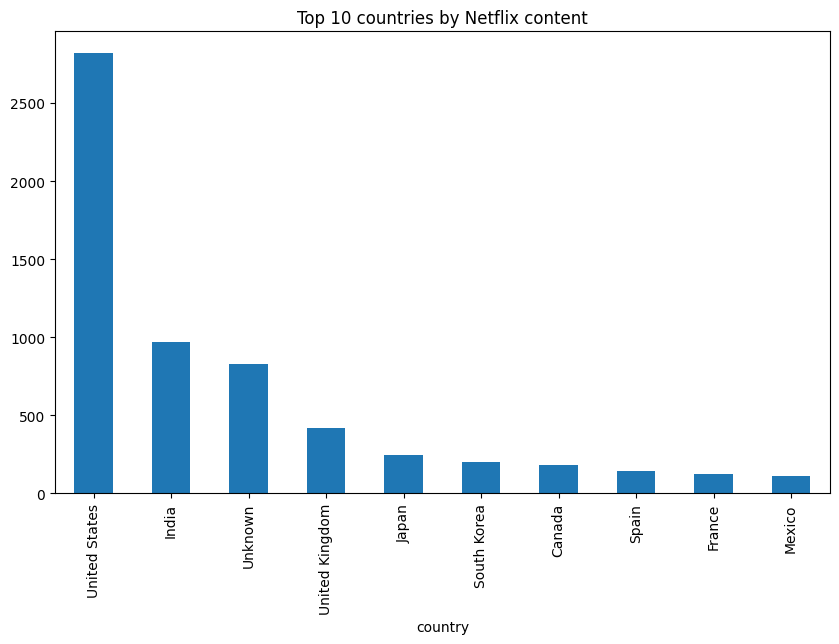

In [18]:
# Count movies and TV shows per country
country_content = netflix['country'].value_counts()

# Visualize the top 10 countries
import matplotlib.pyplot as plt
country_content.head(10).plot(kind='bar', figsize=(10, 6), title="Top 10 countries by Netflix content")
plt.show()


<span style="color: orange;">**The world's leading film**</span>

- <span style="color: orange;">The US and India lead in film and TV production. Both countries are top producers worldwide.</span>

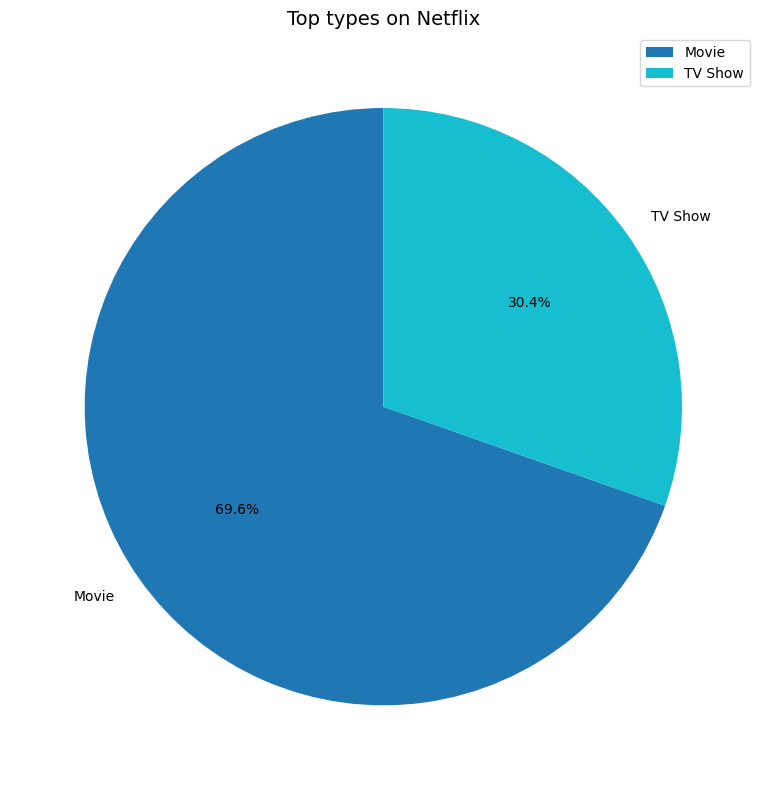

In [19]:
# Count occurrences of each type
type_counts = netflix['type'].value_counts()

# Display the Top 10 types (if there are more than 10, otherwise show all types)
top_10_types = type_counts.head(10)

# Create a pie chart for the Top 10 types
plt.figure(figsize=(8, 8))  # Adjust figure size for better proportions
top_10_types.plot(
    kind='pie',
    autopct="%.1f%%",  # Display percentages
    startangle=90,     # Start angle for better alignment
    colormap='tab10',  # Use a color map for variety
    ylabel='',         # Remove default y-axis label for better appearance
    legend=True        # Show legend for better understanding
)

# Add title
plt.title("Top types on Netflix", fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the chart
plt.show()



<span style="color: orange;">**Type on Nteflix**</span>

- <span style="color: orange;"> The production of motion pictures represents a significant aspect of our industry, whereas the production of television programmes is less prevalent. It is reasonable to conclude that movies represent a more short-term investment, while TV shows require a larger budget in the long term. </span>

There are more films than TV series, because films are generally less expensive to produce, more accessible to smaller studios, and reach a global audience more easily. Series, while extremely popular thanks to streaming platforms, require a long-term commitment from producers and viewers, which limits their number.

#### <span style="color: #87CEEB;">b.II) Exploratory Analysis by years</span>

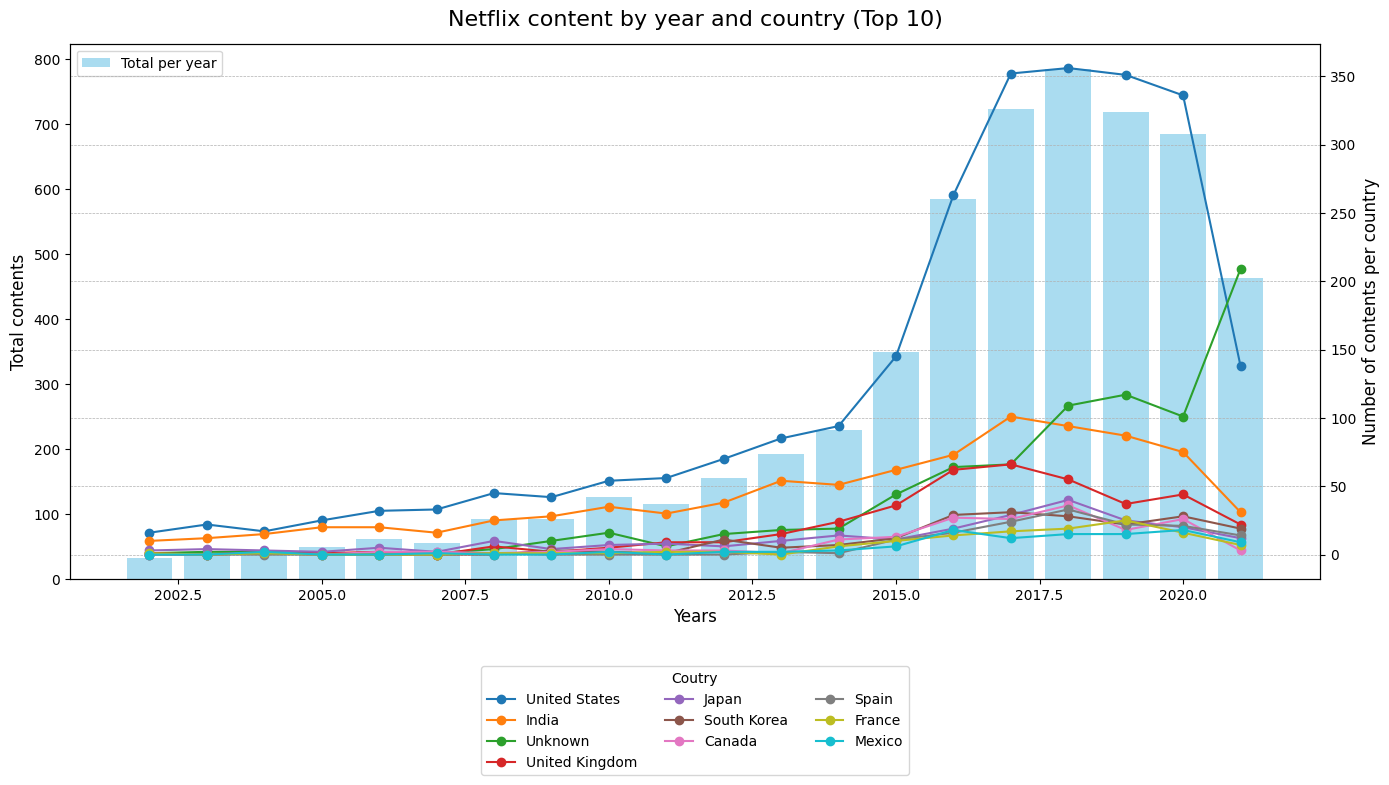

In [21]:
import matplotlib.pyplot as plt

# Group by country and release year, then count the occurrences
types_by_year = netflix.groupby(['country', 'release_year']).size().unstack(fill_value=0)

# Filtrer les années récentes (e.g., dernières 20 années)
recent_years = types_by_year.loc[:, types_by_year.columns[-20:]]

# Sum for each country over recent years
recent_years_sum = recent_years.sum(axis=1).sort_values(ascending=False)

# Keep the top 10 countries (by total quantity of content)
top_10_countries = recent_years_sum.head(10).index

# Filter data for these countries
top_countries_data = recent_years.loc[top_10_countries]

# Calculate total by year
total_by_year = top_countries_data.sum(axis=0)

# Transpose to get the years online
top_countries_data = top_countries_data.T

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Draw bar graph (total by year)
ax1.bar(top_countries_data.index, total_by_year, color='skyblue', alpha=0.7, label="Total per year")
ax1.set_ylabel("Total contents", fontsize=12)
ax1.set_xlabel("Years", fontsize=12)
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Add a secondary axis to curves
ax2 = ax1.twinx()

# Plot curves for the 10 main countries
for country in top_countries_data.columns:
    ax2.plot(top_countries_data.index, top_countries_data[country], marker='o', label=country)

ax2.set_ylabel("Number of contents per country", fontsize=12)
ax2.tick_params(axis='y')

# Add a legend at the bottom of curves
ax2.legend(title="Coutry", loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Add a title with adjusted margins
fig.suptitle("Netflix content by year and country (Top 10)", fontsize=16)
fig.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=0.9)

# Addition of a grid for improved readability
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()




Up until 2012, production has been rising steadily. From that year onwards, a significant rise is particularly noticeable in the USA and India, before a marked fall in 2020.

<Figure size 1200x600 with 0 Axes>

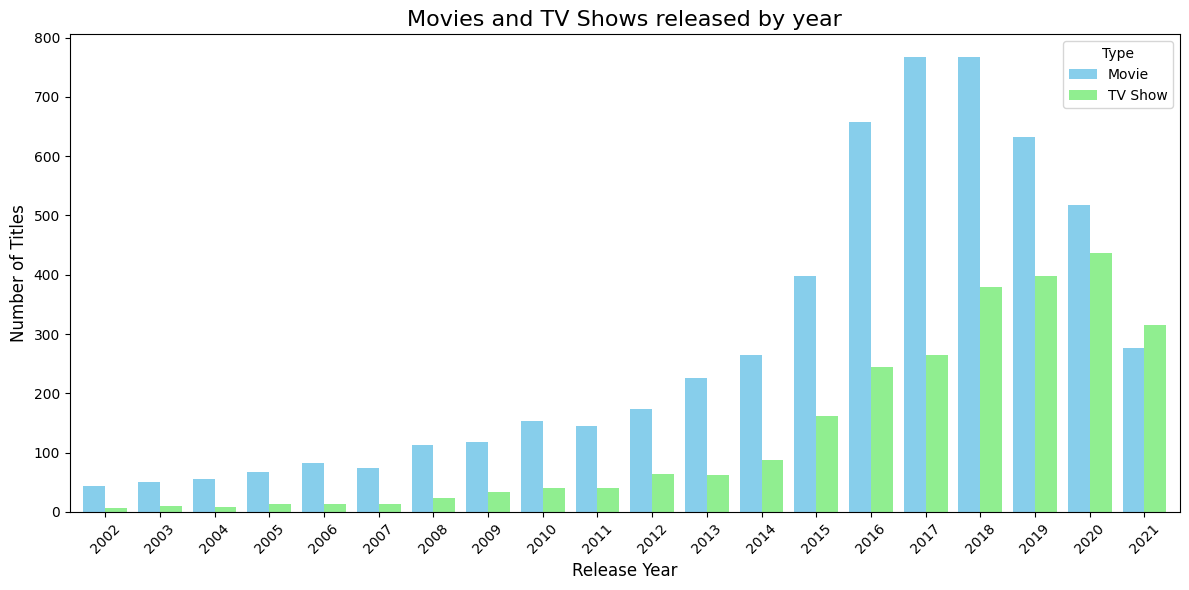

In [22]:
# Group data by 'release_year' and 'type', counting occurrences
types_by_year = netflix.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Filter for recent or specific years (e.g., last 20 years)
recent_years = types_by_year.tail(20)

# Plot a grouped bar chart for the data
plt.figure(figsize=(12, 6))
recent_years.plot(kind='bar', width=0.8, figsize=(12, 6), color=['skyblue', 'lightgreen'])

# Add title and labels
plt.title("Movies and TV Shows released by year", fontsize=16)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add a legend
plt.legend(title="Type", fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()

# Show the chart
plt.show()


1. Every year, there are systematically more films than television series.
2. From 2016 to 2018, there was a significant peak in films, with almost 770 titles released in 2017 and 2018.
3. TV series began to increase steadily from 2015 and peaked in 2020, with around 430 titles.
4. After 2019, film and TV series releases declined, particularly in 2021.

In summary, the chart shows a sharp increase in media releases from 2013 onwards, with films dominating the overall tally, while TV series show a notable upward trend in recent years.

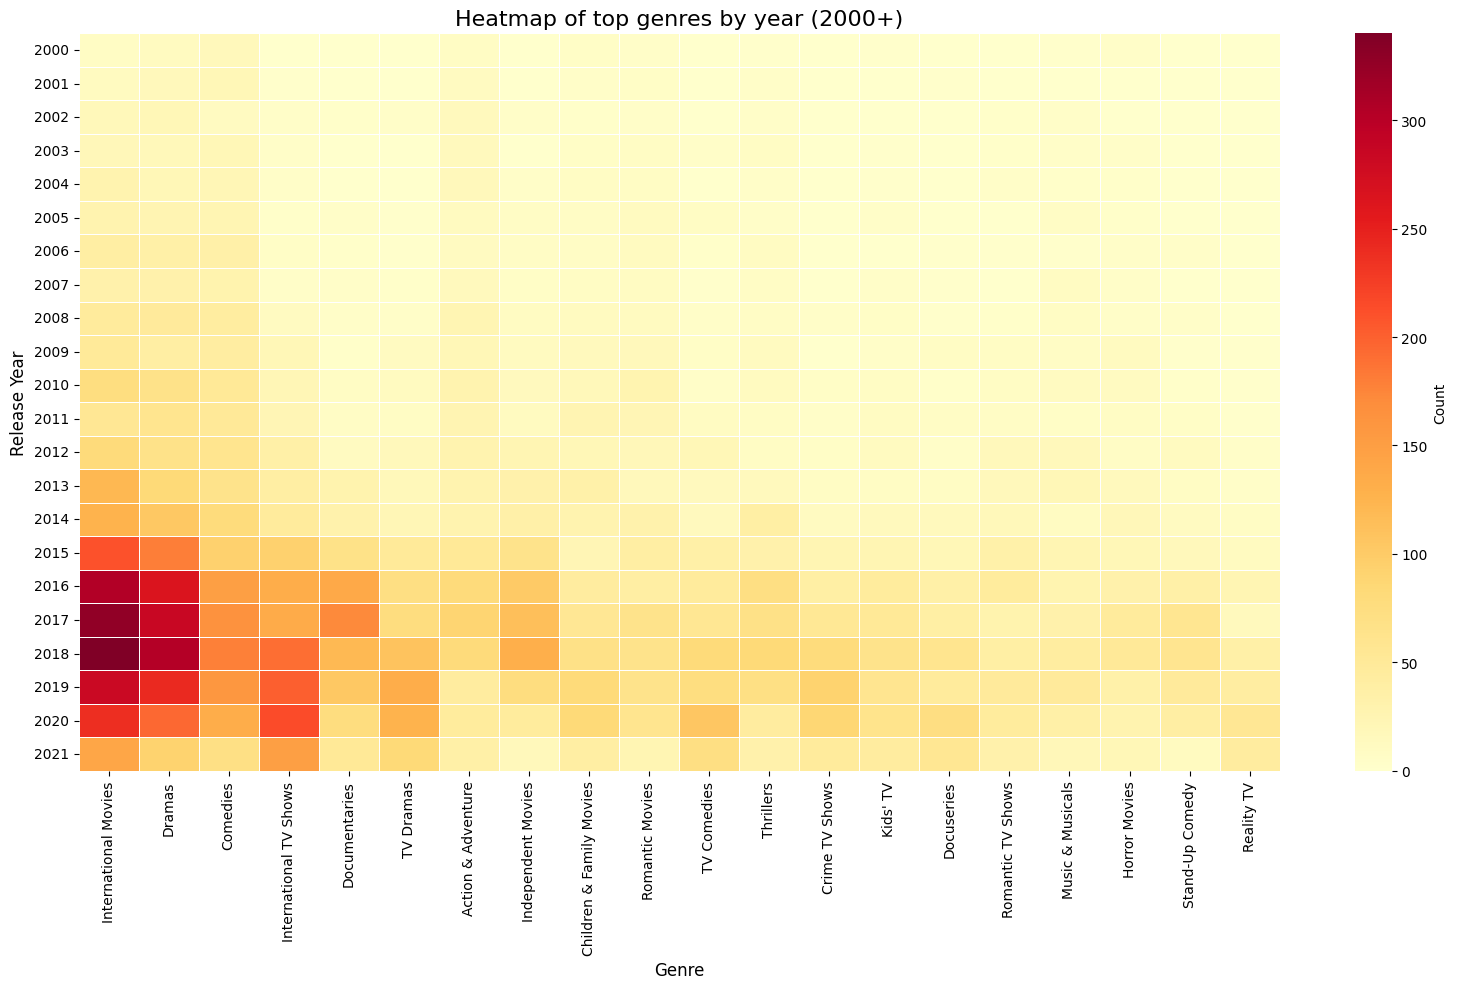

In [23]:
# Clean genres to divide combined categories
netflix['listed_in'] = netflix['listed_in'].str.split(', ')
netflix = netflix.explode('listed_in')   # Split combined genres into individual lines

# Group and count occurrences by year and gender
genres_by_year = netflix.groupby(['release_year', 'listed_in']).size().unstack(fill_value=0)

# Filter for recent years (e.g. 2000 onwards) and main genres
recent_years = genres_by_year.loc[genres_by_year.index >= 2000]
top_genres = recent_years.sum().sort_values(ascending=False).head(20).index  # Garder les 20 genres les plus fréquents
recent_years = recent_years[top_genres]

# Creating a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(recent_years, cmap="YlOrRd", annot=False, linewidths=0.5, cbar_kws={'label': 'Count'})

# Add title and labels
plt.title("Heatmap of top genres by year (2000+)", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Release Year", fontsize=12)

plt.tight_layout()
plt.show()


This heat map shows the main types of media content broadcast over time. The x-axis shows different genres (e.g. dramas, comedies, international films) and the y-axis shows years from 2000 to 2021. The colour shows the number of titles released in each genre each year.

Main points:
1. Dramas were the most important genre from 2016 to 2018.
2. More international films and TV series are being made, especially since 2015.
3. There has been more content created in all genres since 2015, with the most between 2017 and 2019.
4. Some genres like documentaries, children's films and reality TV have grown a little, especially after 2013.
5. There was less activity in 2020-2021 in some genres, probably because of problems making films.

<Figure size 1200x600 with 0 Axes>

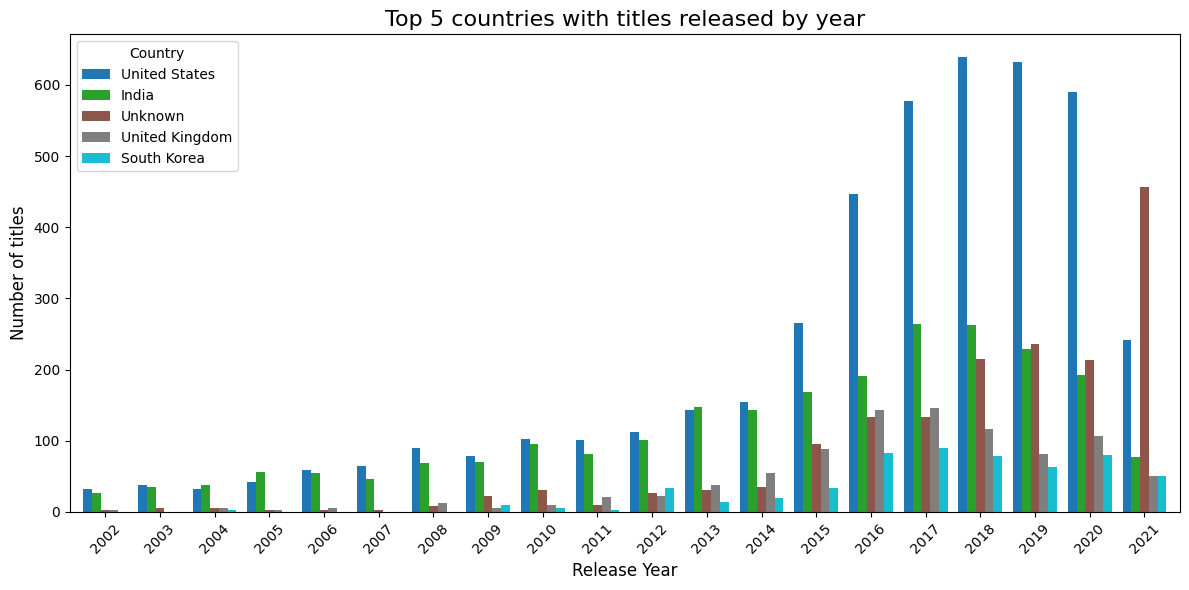

In [24]:
# Group data by 'release_year' and 'country', counting occurrences
countries_by_year = netflix.groupby(['release_year', 'country']).size().unstack(fill_value=0)

# Filter for recent or specific years (e.g., last 20 years)
recent_years = countries_by_year.tail(20)

# Select the top 5 countries with the most titles for simplicity
top_countries = recent_years.sum().nlargest(5).index
recent_years = recent_years[top_countries]

# Plot a grouped bar chart for the data
plt.figure(figsize=(12, 6))
recent_years.plot(kind='bar', width=0.8, figsize=(12, 6), colormap='tab10')

# Add title and labels
plt.title("Top 5 countries with titles released by year", fontsize=16)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Number of titles", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add a legend
plt.legend(title="Country", fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()

# Show the chart
plt.show()


<span style="color: orange;">**The following key observations were made:**</span>

- The United States has a clear lead in this ranking, with the highest number of publications, particularly over the period from 2016 to 2019, with over 600 titles in 2018 alone.
- While India's output is increasing at a steady pace, it is still in second place, with American publications outstripping it.

<span style="color: orange;">**The key observations are as follows:**</span>

- The United States leads the ranking in terms of the number of titles published, particularly between 2016 and 2019, when the figure exceeded 600 in 2018.
- Despite India's consistent growth in output, it currently ranks second behind the USA.

The number of titles published in the **`Unknow`** category saw a considerable increase in 2021, with over 450 titles published.
It is notable that the USA has been at the top of the ranking for a number of years, with a record number of publications exceeding 600 titles in 2018. While Indian production is making steady progress, it is currently placed second behind the USA. The 'Unknown' category saw a significant increase in 2021, with over 450 books published, up from previous years.

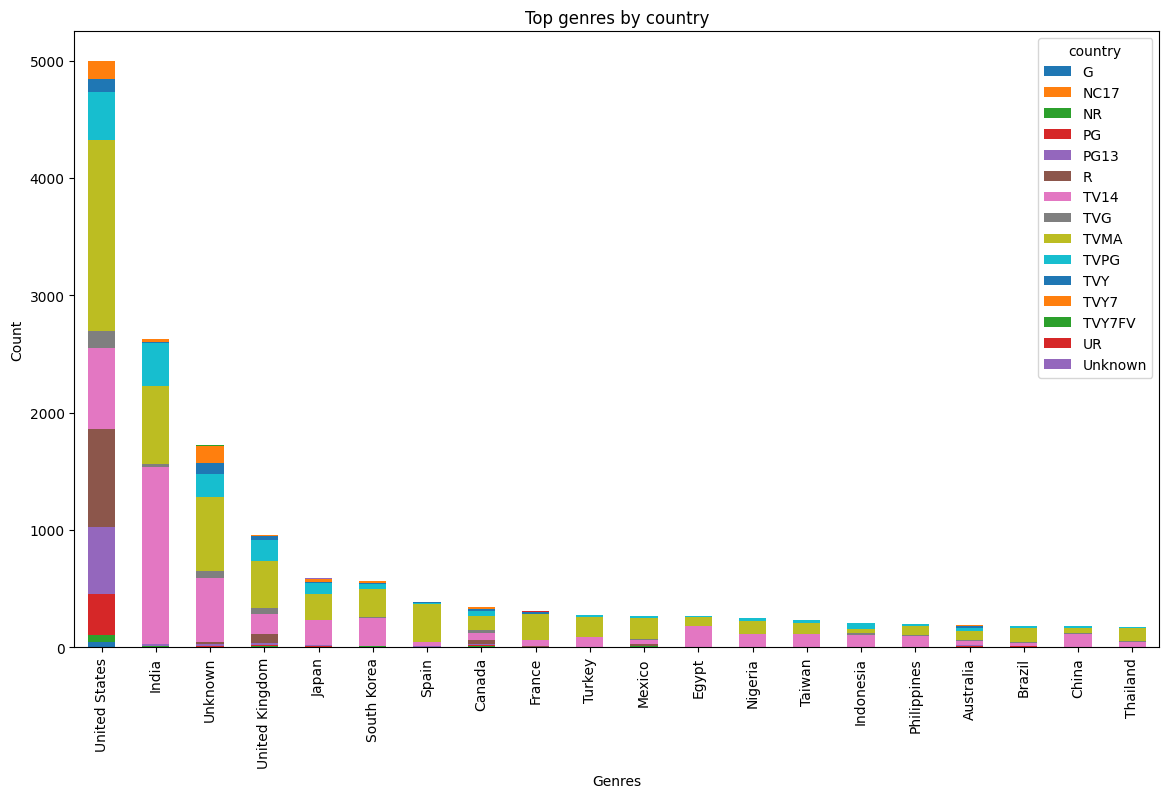

In [25]:
# Clean genres to divide combined categories
netflix['listed_in'] = netflix['listed_in'].str.split(', ')
netflix = netflix.explode('listed_in')  # Split combined genres into individual lines

# Group by 'rating' and 'country', then count occurrences
genres_by_rating = netflix.groupby(['rating', 'country']).size().unstack(fill_value=0)  

# (Optional) Keep only the 20 most frequent genera to simplify analysis
top_genres = genres_by_rating.sum(axis=0).sort_values(ascending=False).head(20).index
genres_by_rating_top = genres_by_rating[top_genres]

# Draw a graph to visualize the most popular genres by rating
genres_by_rating_top.T.plot(kind='bar', figsize=(14, 8), stacked=True)
plt.title('Top genres by country')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.legend(title='country')
plt.show()

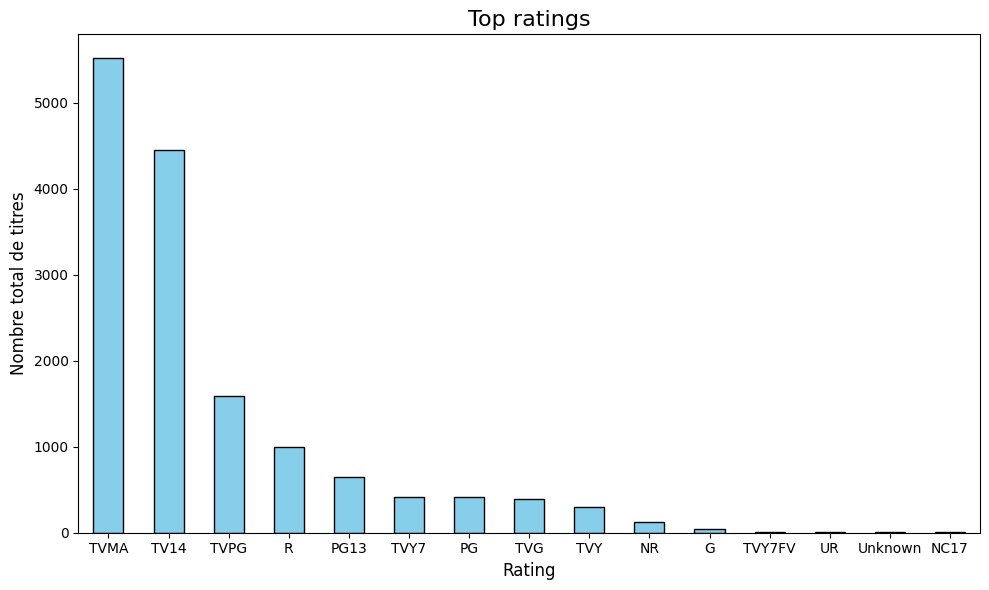

In [26]:
top_ratings = genres_by_rating_top.sum(axis=1).sort_values(ascending=False)

# Create a bar graph for top ratings
plt.figure(figsize=(10, 6))
top_ratings.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Nombre total de titres', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

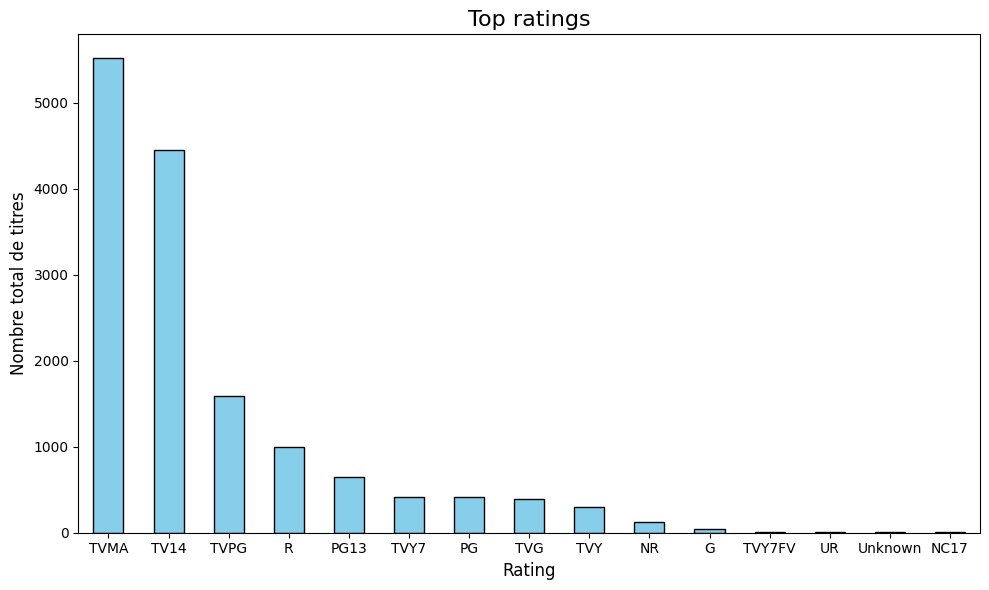

In [27]:
top_ratings = genres_by_rating_top.sum(axis=1).sort_values(ascending=False)

# Create a bar graph for top ratings
plt.figure(figsize=(10, 6))
top_ratings.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Nombre total de titres', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

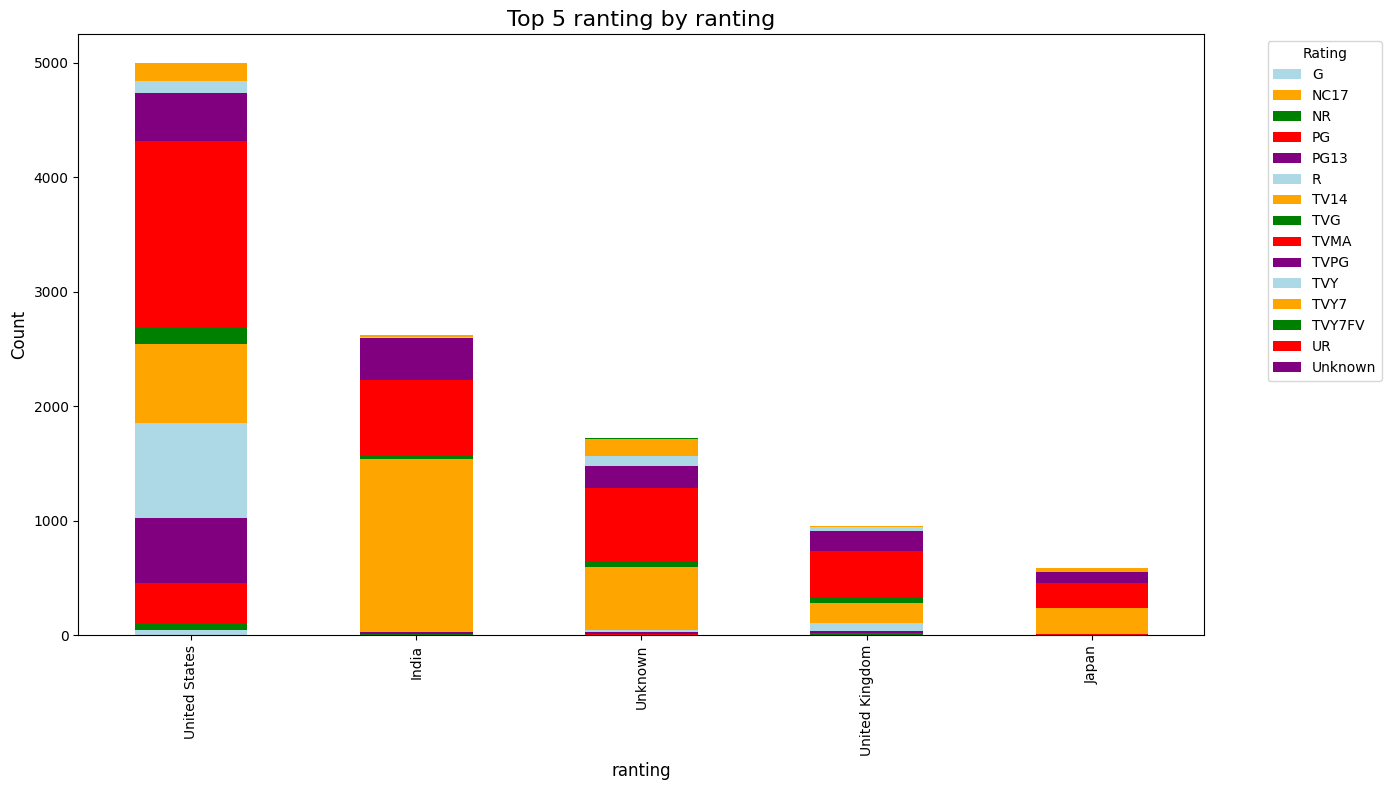

In [28]:
# Group by 'rating' and 'ranting, then count occurrences
ranting_by_rating = netflix.groupby(['rating', 'country']).size().unstack(fill_value=0)

# Keep only the 5 most frequent ranting to simplify analysis
top_ranting = ranting_by_rating.sum(axis=0).sort_values(ascending=False).head(5).index
ranting_by_rating_top = ranting_by_rating[top_ranting]

# Draw a graph to visualize the most popular ranting by rating
ranting_by_rating_top.T.plot(kind='bar', figsize=(14, 8), stacked=True, color=['lightblue', 'orange', 'green', 'red', 'purple'])
plt.title('Top 5 ranting by ranting', fontsize=16)
plt.xlabel('ranting', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


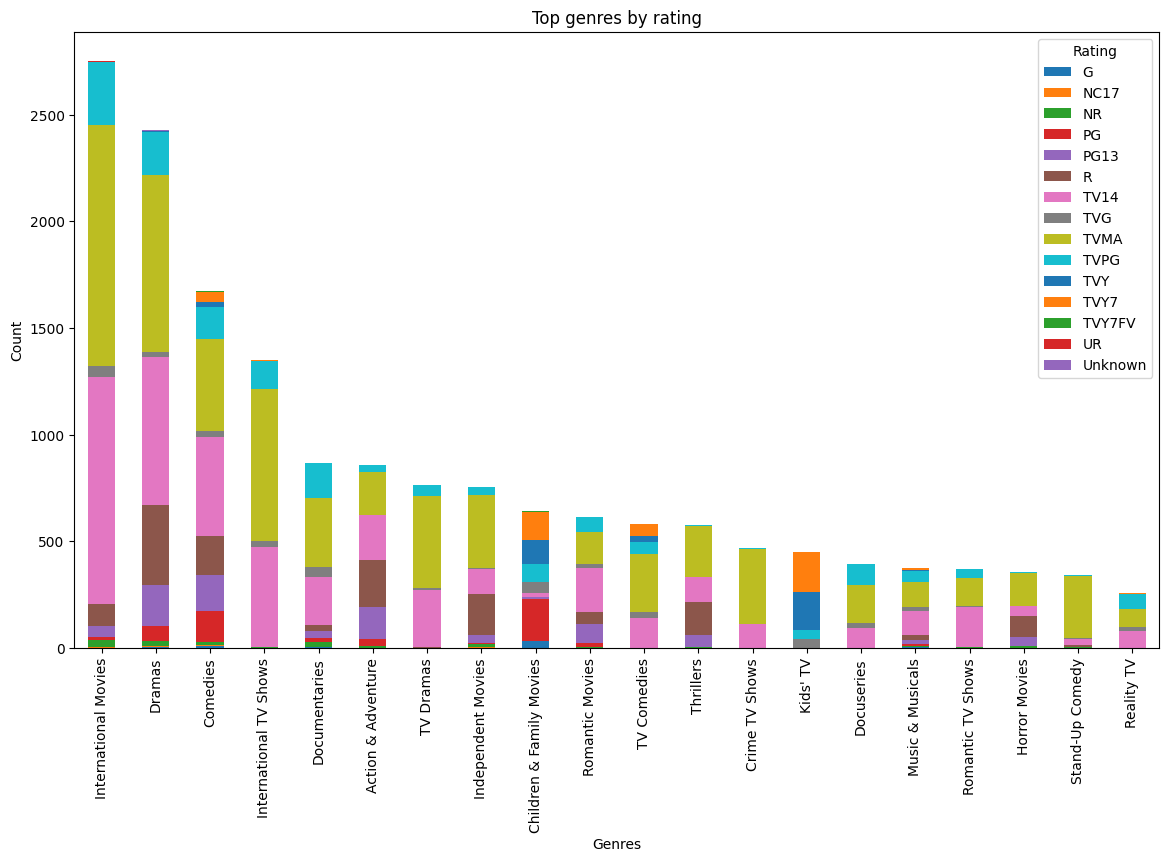

In [29]:
# Clean genres to divide combined categories
netflix['listed_in'] = netflix['listed_in'].str.split(', ') # Split combined genres into individual lines
netflix = netflix.explode('listed_in')  

# Group by 'rating' and 'listed_in', then count occurrences
genres_by_rating = netflix.groupby(['rating', 'listed_in']).size().unstack(fill_value=0)

# (Optional) Keep only the 20 most frequent genera to simplify analysis
top_genres = genres_by_rating.sum(axis=0).sort_values(ascending=False).head(20).index
genres_by_rating_top = genres_by_rating[top_genres]

# Draw a graph to visualize the most popular genres by rating
genres_by_rating_top.T.plot(kind='bar', figsize=(14, 8), stacked=True)
plt.title('Top genres by rating')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.legend(title='Rating')
plt.show()


#### <span style="color: #87CEEB;">b.II) Exploratory Analysis by mouvies</span>

Top 10 Directors:
director
Unknown                5884
Cathy Garcia-Molina      37
Youssef Chahine          33
Suhas Kadav              29
David Dhawan             27
Name: count, dtype: int64


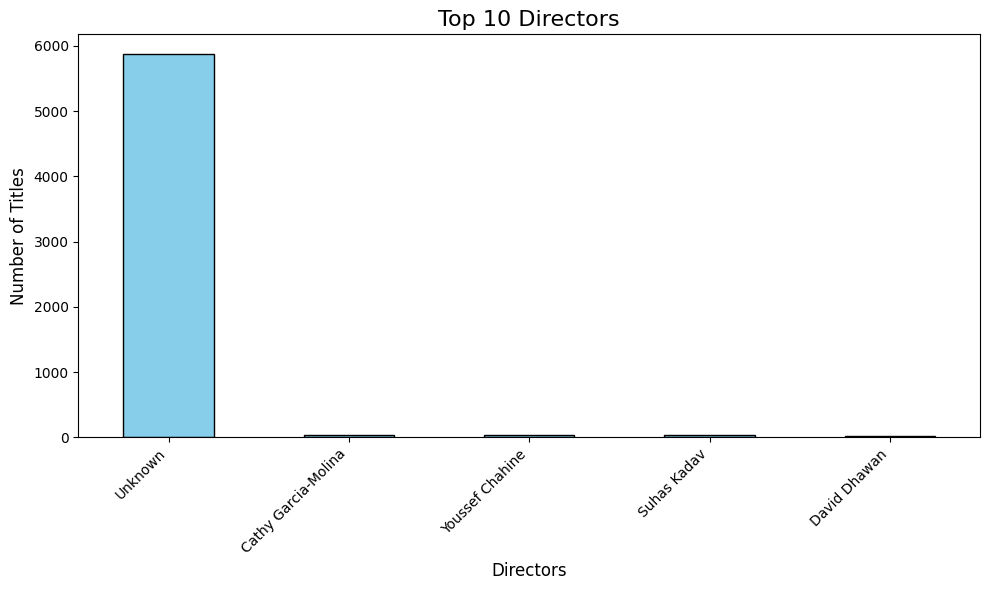

In [81]:
# Calculate the frequency of each director
netflix['director'] = netflix['director'].str.split(', ')
netflix = netflix.explode('director')
top_directors = netflix['director'].value_counts().head(5)

# Display the Top 10 directors
print("Top 10 Directors:")
print(top_directors)

# Create a bar chart to visualize the Top 10 directors
top_directors.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Top 10 Directors', fontsize=16)
plt.xlabel('Directors', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.tight_layout()
plt.show()

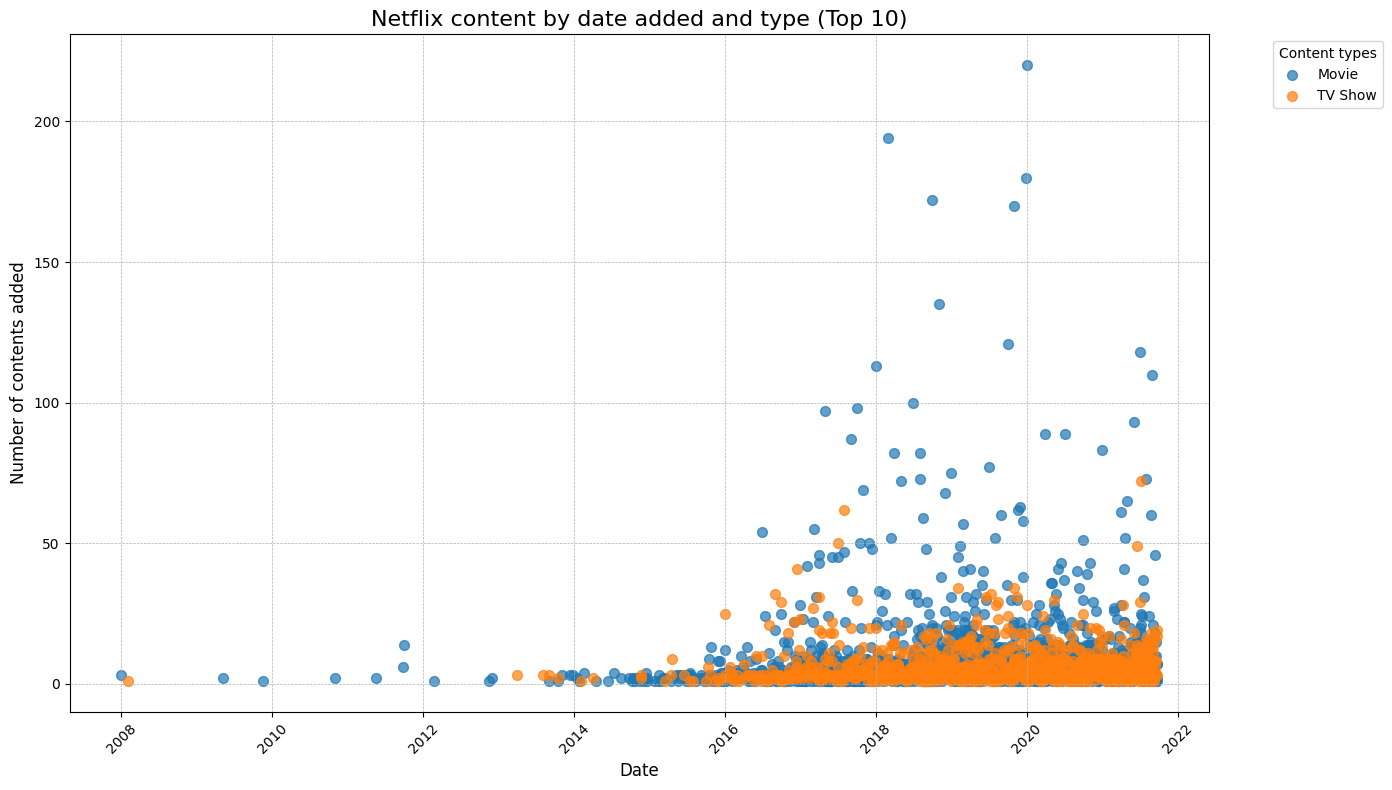

In [88]:
# Cleaning and data preparation 
netflix['type'] = netflix['type'].str.split(',')
netflix = netflix.explode('type')  
# Filter out valid data
netflix = netflix.dropna(subset=['date_added', 'type'])

# Convert 'date_added' to datetime for easier sorting
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')
netflix = netflix.dropna(subset=['date_added'])  

# Select the 10 most frequent types
top_10_types = netflix['type'].value_counts().head(10).index

# Filter data for these types
filtered_data = netflix[netflix['type'].isin(top_10_types)]

# Data grouping 
# Group by date added and type to count occurrences
grouped_data = filtered_data.groupby(['date_added', 'type']).size().reset_index(name='count')

# Creating the scatter graph
plt.figure(figsize=(14, 8))

# Loop for each type to draw a scatter plot
for content_type in top_10_types:
    type_data = grouped_data[grouped_data['type'] == content_type]
    plt.scatter(type_data['date_added'], type_data['count'], label=content_type, s=50, alpha=0.7)

# Graphic
plt.title("Netflix content by date added and type (Top 10)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of contents added", fontsize=12)
plt.xticks(rotation=45)  # Rotation des dates pour plus de lisibilité
plt.legend(title="Content types", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(visible=True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


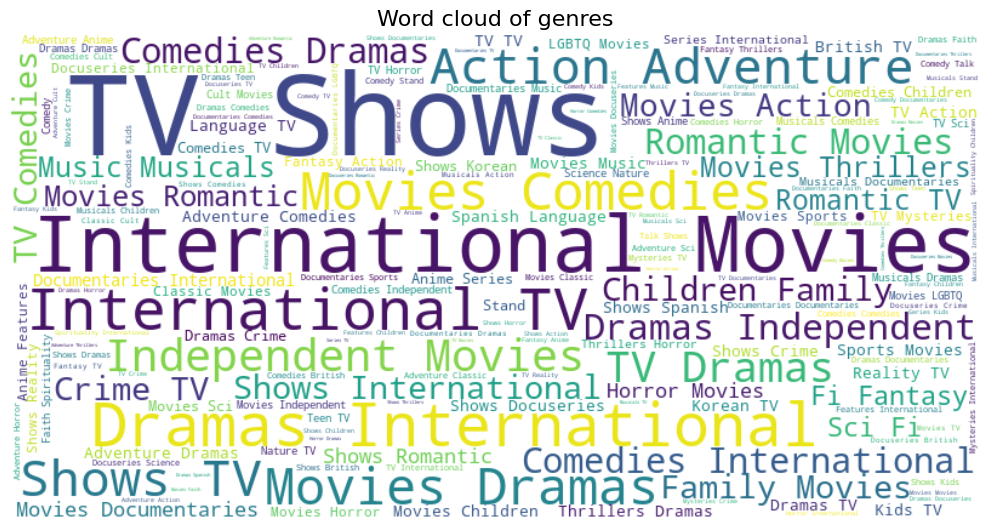

In [83]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Combine all categories into a single string and remove quotes or special characters
all_categories = " ".join(
    netflix['genres']
    .dropna()
    .astype(str)
    .str.replace(r"['\"]", "", regex=True)  # Remove single and double quotes
    .str.split(', ')
    .sum()
)

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_categories)

# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud of genres', fontsize=16)
plt.tight_layout()
plt.show()


In [85]:
netflix.to_csv('netflix_data.csv', index=False)